## 5A Extract pattern - Standard Deviation

Extrae los patrones **desviación estándar** del conjunto de TRAINING i calcula en rendimineto con el conjunto de TESTING

### <font color='Orange'> extractPatternsAllBlobs(data,nameMaterial)</font>

Función que crea el conjunto de datos y etiquetas para entrentar al modelo regresión lineal

1. Del DataFrame selecciona únicamente el Signal normalizado
2. Calcula la desviación estandard
3. Calcula el Quartil Q1 y Q3 (25% y 75%)
4. Calcula el Signal medio de todos los Signals que se encuentran entre Q1 y Q3, y pasa a ser el **Pattern** (el resto son ignorados)
5. Para cada Signal de píxel pasa a calcular la desviación estàndard Con respecto al **Pattern**
6. De la distribución calcula la gráfica de cuartiles y establece el **Threshold de la desviación estándard** repecto el  **Pattern** a **Q3+IRQ** (Q3-Q1) (en pincipio suele ser Q3+IRQ*1.5 según la gráfica de bigotes) pero se deja así para obtener datos mas acurados.

Por lo tanto el **Pattern** en realidad pasa a ser la tupla de:
* __<u>nameMaterial</u>__ --> Nombre del material del cual se ha extraido el patrón
* __<u>pattern</u>__ --> Signal Pattern
* __<u>sdPattern</u>__ --> Threshold de la desviación estándard. Para que un píxel sea reconocido, la desviación estándard de este con respecto el **Pattern** debe ser inferior a **sdPattern**

### <font color='Orange'> extractPatternsAllBlobs(data,nameMaterial)</font>

Funció a la que li passem al dataFrame amb el Signal normalitzat (que hem obtingut amb la funció **extractDescriptorSignal()**) de tots els píxels d'un DataSet determinat i n'obté el **Pattern**. Per fer-ho aplica els següents casos:

1. Del DataFrame selecciona únicament el Signal normalitzat 
2. En calcula la desviació estandard
3. Calcula el Quartil Q1 i Q3 (25% i 75%)
4. Calcula el Signal mig de tots els Signals que es troben entre Q1 i Q3, i passa a per el **Pattern** (la resta son ignorats)
5. Per cada Signal de píxel passa a calcular la desviació estàndard respecte el **Pattern**
6. De la distribució en calcula la gràficas de quartils i estableix el **Threshold de la desviació estàndard** respecxe el **Pattern** a **Q3+IRQ** (Q3-Q1) (en pincipi sols ser Q3+IRQ*1.5 segons la gràfica de bigotis) però ho deixo així per a que sigui mes acurat.

Per tant el Patro en realitat passa a ser la tupla de:
* __<u>nameMaterial</u>__ --> Nom del material del qual se n'ha extret el patró
* __<u>pattern</u>__ --> Signal Pattern
* __<u>sdPattern</u>__ --> Threshold de la desviació estàndard. Per a que un píxels sigui reconegut la desviació estàndard d'aquest respecte el **Pattern** ha de ser inferior a **sdPattern**


In [1]:
import pandas as pd
import numpy as np
import math

def extractPatternsAllBlobs(fileData,nameMaterial):

    data = pd.read_csv(fileData, sep='\t')
    idx0 = data.columns.get_loc('0')
    spectPixels = data.iloc[:,idx0:(idx0+224)]
    sdPixels= np.zeros(len(spectPixels))
    for n in range(len(data)):
        sdPixels[n] = np.std(spectPixels.iloc[n])

    first_quartile = np.quantile(sdPixels, 0.25)
    third_quartile = np.quantile(sdPixels, 0.75) 

    pattern = np.zeros(224)
    num=0
    for n in range(len(data)):
        desStPix = np.std(spectPixels.iloc[n])
        if(desStPix>=first_quartile and desStPix<= third_quartile):
            pattern += spectPixels.iloc[n]
            num +=1
    pattern = pattern/num 

    for n in range(len(data)):
         sdPixels[n] = math.sqrt(((spectPixels.iloc[n] - pattern)**2).sum()/224)
    first_quartile = np.quantile(sdPixels, 0.25)
    third_quartile = np.quantile(sdPixels, 0.75)
    sdPattern = third_quartile+(third_quartile-first_quartile)*1.5                            

    pattern = pd.DataFrame([[nameMaterial,pattern.to_list(),sdPattern]],columns = ['PatternName','Signal','staDevThreshold']) 

    return pattern

### <font color='Orange'> converter(data,nameMaterial)</font>

Función axiliat que servirá para leer el Signal al leer un fichero CSV, ya que la función de 'to_csv' de Pandas no implementa correctamente la lectura de un array, ya que lo lee como un string.


In [2]:
def converter(instr):
    return np.fromstring(instr[1:-1],sep=',')

Lee todos los píxeles de los ***SET TRAININGs***  para genera los patrones pertinentes

<font color='Green'>(También lee el patrón directamente del fichero (en el caso que ya esté creado), evitando que sea generado de nuevo)</font>


In [3]:
import os 

sourceData = r"C:\Users\jrosell\Hyperspectral\___PFM___\01_DATASET\05_DATASET_TRAINING"
destData = r"C:\\Users\jrosell\Hyperspectral\___PFM___\01_DATASET\02_DATASET_RAW_Seleccio_TRAINING_develop"

dirName = os.path.dirname(os.path.join(sourceData,r"Patterns"))
if not os.path.exists(dirName) and len(dirName)>0:
    os.makedirs(dirName)
        
dfPatt_HDPE = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_003_01_HDPE.csv"),"HDPE")
dfPatt_HDPE.to_csv(os.path.join(sourceData,r"Patterns\Pattern_HDPE.csv"), index=False)
dfPatt_HDPE_read = pd.read_csv(r"Patterns\Pattern_HDPE.csv", converters={'Signal':converter})

dfPatt_PET = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_003_02_PET.csv"),"PET")
dfPatt_PET.to_csv(os.path.join(sourceData,r"Patterns\Pattern_PET.csv"), index=False)
dfPatt_PET_read = pd.read_csv(r"Patterns\Pattern_PET.csv", converters={'Signal':converter})

dfPatt_PP = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_003_03_PP.csv"),"PP")
dfPatt_PP.to_csv(os.path.join(sourceData,r"Patterns\Pattern_PP.csv"), index=False)
dfPatt_PP_read = pd.read_csv(r"Patterns\Pattern_PP.csv", converters={'Signal':converter})

dfPatt_PS = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_003_04_PS.csv"),"PS")
dfPatt_PS.to_csv(os.path.join(sourceData,r"Patterns\Pattern_PS.csv"), index=False)
dfPatt_PS_read = pd.read_csv(r"Patterns\Pattern_PS.csv", converters={'Signal':converter})

dfPatt_PVC = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_003_05_PVC.csv"),"PVC")
dfPatt_PVC.to_csv(os.path.join(sourceData,r"Patterns\Pattern_PVC.csv"), index=False)
dfPatt_PVC_read = pd.read_csv(r"Patterns\Pattern_PVC.csv", converters={'Signal':converter})

dfPatt_Paper = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_003_06_Paper.csv"),"Paper")
dfPatt_Paper.to_csv(os.path.join(sourceData,r"Patterns\Pattern_Paper.csv"), index=False)
dfPatt_Paper_read = pd.read_csv(r"Patterns\Pattern_Paper.csv", converters={'Signal':converter})


Muestra la gràfica comparativa de los Signals de los distintos materiales

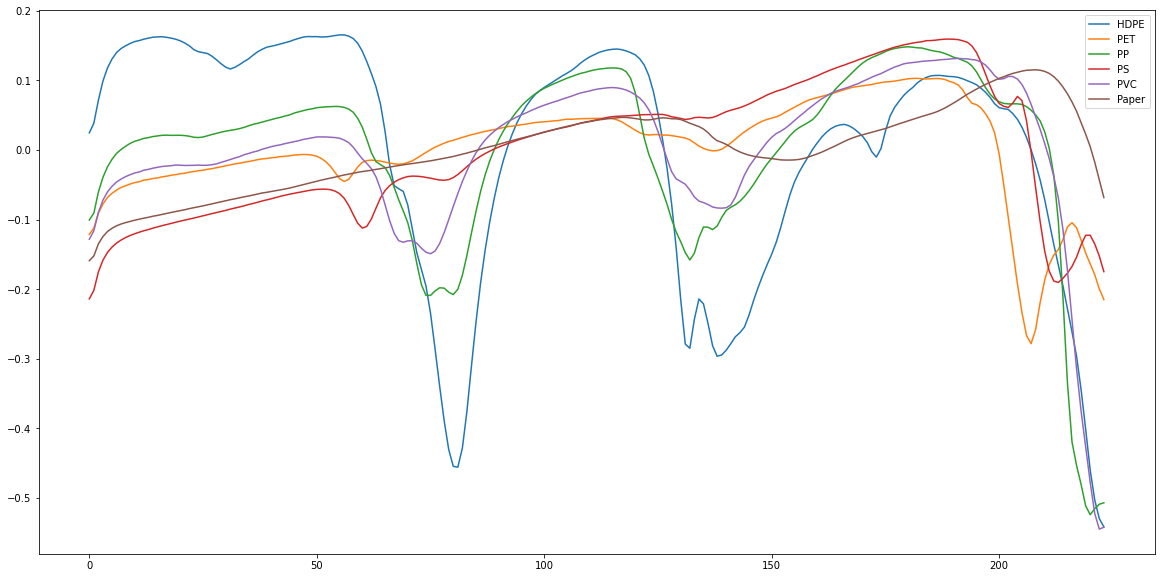

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(dfPatt_HDPE['Signal'][0], label="HDPE")
plt.plot(dfPatt_PET['Signal'][0],label="PET")
plt.plot(dfPatt_PP['Signal'][0],label="PP")
plt.plot(dfPatt_PS['Signal'][0],label="PS")
plt.plot(dfPatt_PVC['Signal'][0],label="PVC")
plt.plot(dfPatt_Paper['Signal'][0],label="Paper")
plt.legend(loc='best')

Una vez obtenido el **Pattern** de cada material se analiza los **SETs_TRAINING** con estos mismos patrones. De esta comparativa se muestra la matriz de confusión.

Esta comprovación nos sirve para detectar possibles outliers en el mismo **SETs_TRAINING** como detectar blobs que contienen mas de un tipo de material (por ejemplo botellas, etiquetas o tapones de distinto material) 

In [5]:
def correspondsToPattern(pixel,setPattern):
    
    sdMin = 99999
    nPatt = -1
    npPixel_norm = pixel.iloc[4:(4+224)].to_numpy()

    for idx, patt in enumerate(setPattern):    
        sdPixel = math.sqrt(((npPixel_norm - patt['Signal'][0])**2).sum()/224)   
        if sdPixel<=patt['staDevThreshold'][0]:
            if sdPixel<sdMin:
                sdMin=sdPixel
                nPatt = idx 
    return nPatt

In [6]:
import os

def appyPatterToBlob(dfBlob, setPattern, pattDefault_Img=-1, pathDefault_Result=-1, saveImage=False,idxImage=0):

    pathImagesOut = r".\00_OUT_Standard_Deviation"
    
    if saveImage and not os.path.isdir(pathImagesOut):
        os.mkdir(pathImagesOut)
    
    img = np.zeros([96, 320 ,3]).astype(np.uint8)
    
    # Inspecciona tots els píxels i guada en un vector l'acumulat quants corresponen a cada patró
    # Sobre la imatge guarda a cada píxel el patró identificat (index patro+1, ja que el primer patró es 0) i els
    # píxels dels que no s'ha identificat cap patró si copia [255,0,0]
    buffPatt = np.zeros(len(setPattern)+1, dtype=int)
    for n in range(len(dfBlob)):
        patt = correspondsToPattern(dfBlob.iloc[n],setPattern)
        if patt>-1:            
            buffPatt[patt] += 1
        elif patt== -1:
            buffPatt[-1] += 1
                   
        if saveImage:
            if patt== -1:
                img[dfBlob.iloc[n]['y'].astype('int'),dfBlob.iloc[n]['x'].astype('int')]= [255,0,0]
            else:
                img[dfBlob.iloc[n]['y'].astype('int'),dfBlob.iloc[n]['x'].astype('int')]= [patt+1,0,0]
    result = np.where(buffPatt == np.max(buffPatt))
    
    if saveImage:
        if pattDefault_Img > -1:
            idx = np.where(np.all(img == [255,0,0], axis=-1)) 
            img[idx]= [128,128,128]
            idx = np.where(np.all(img == [pattDefault_Img+1,0,0], axis=-1)) 
            img[idx]= [0,255,0]
            for idx in range(len(setPattern)):
                idx = np.where(np.all(img == [idx+1,0,0], axis=-1)) 
                img[idx]= [0,0,255]                           
        else:
            idx = np.where(np.all(img == [255,0,0], axis=-1)) 
            img[idx]= [128,128,128]
            idx = np.where(np.all(img == [result+1,0,0], axis=-1)) 
            img[idx]= [0,255,0]
            for idx in range(len(setPattern)):
                idx = np.where(np.all(img == [idx+1,0,0], axis=-1)) 
                img[idx]= [0,0,255]  
            pass
        
        cv2.imwrite(pathImagesOut+"\\identifPatter_"+f'{idxImage:03d}'+".bmp",img)    
        
    if (pathDefault_Result==-1):
        result = np.where(buffPatt[:-1] == np.max(buffPatt[:-1]))[0][0]
    else:
        result = pathDefault_Result
        
    if np.sum(buffPatt)>0 and len(dfBlob)>0:
        percentPatt= buffPatt[result]/np.sum(buffPatt)
        percentAll= buffPatt[result]/len(dfBlob)
    else:
        percentPatt = 0.0
        percentAll = 0.0
        
    return (result,setPattern[result]['PatternName'][0],percentAll,buffPatt)

In [7]:
from tqdm.notebook import tqdm  #mostra la barra s'estat

setPatterns = [dfPatt_HDPE,dfPatt_PET,dfPatt_PP,dfPatt_PS,dfPatt_PVC,dfPatt_Paper]

def appyPatterToBlobs(dataBlobs, setPattern,creiteria, pattDef_res,pattDef_img,saveImg):
    
    if creiteria==0:
        groups= dataBlobs.groupby(['image'])
    elif creiteria==1:
        groups= dataBlobs.groupby(['image', 'blob'])

    
    keys = groups.groups.keys()

    scoreList=[]
    for idx, i in enumerate(keys):
        res = appyPatterToBlob(groups.get_group(i), setPattern, pathDefault_Result = pattDef_res, pattDefault_Img = pattDef_img, saveImage=saveImg,idxImage=idx)  
        scoreList.append([res[0],res[2]])
    
    return scoreList

#out = appyPatterToBlobs(dfBlobs_HDPE,setPatterns,0,0,0,True)  # Registra imatges
#out = appyPatterToBlobs(dfBlobs_HDPE,setPatterns,1,-1,-1,False) # Bo


<AxesSubplot:>

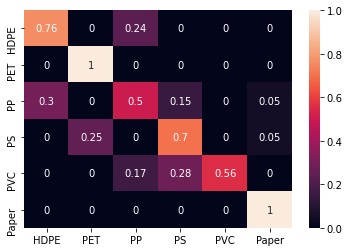

In [8]:
import seaborn as sns

sourceData = r"C:\\Users\jrosell\Hyperspectral\___PFM___\01_DATASET\02_DATASET_RAW_Seleccio_TRAINING_develop"


dfBlobs_HDPE = pd.read_csv(os.path.join(sourceData,"blobs_002_01_HDPE.csv"), sep='\t')
dfBlobs_PET = pd.read_csv(os.path.join(sourceData,"blobs_002_02_PET.csv"), sep='\t')
dfBlobs_PP = pd.read_csv(os.path.join(sourceData,"blobs_002_03_PP.csv"), sep='\t')
dfBlobs_PS = pd.read_csv(os.path.join(sourceData,"blobs_002_04_PS.csv"), sep='\t')
dfBlobs_PVC = pd.read_csv(os.path.join(sourceData,"blobs_002_05_PVC.csv"), sep='\t')
dfBlobs_Paper = pd.read_csv(os.path.join(sourceData,"blobs_002_06_Paper.csv"), sep='\t')

set_TRAIN = [dfBlobs_HDPE,dfBlobs_PET,dfBlobs_PP,dfBlobs_PS,dfBlobs_PVC,dfBlobs_Paper]
setPatterns = [dfPatt_HDPE,dfPatt_PET,dfPatt_PP,dfPatt_PS,dfPatt_PVC,dfPatt_Paper]

CrossMatrix = np.zeros((len(set_TRAIN),len(set_TRAIN)))

for j in range(len(set_TRAIN)):
    for i in range(len(set_TRAIN)):
        out = np.array(appyPatterToBlobs(set_TRAIN[j],setPatterns,1,-1,-1,False))
        CrossMatrix[j,i] =  sum(np.array(out)[:,0] == i)/len(out)
        
dfCM = pd.DataFrame(CrossMatrix)
dfCM.columns = np.array(setPatterns)[:,0,0]
dfCM.index =  np.array(setPatterns)[:,0,0]
sns.heatmap(dfCM, annot = True)
